# 📘 Suite du TP – Analyse des performances d’étudiants

🎯 **Objectif :** Approfondir la préparation du dataset pour une régression linéaire multiple en appliquant la standardisation, la réduction de dimension et la suppression des variables corrélées.

## 🔄 7. Normalisation et standardisation

**0** Comprendre la notion de normalisation et de standardisation 

La standardisation est plus appropriée lorsque les données suivent une distribution normale, 

tandis que la normalisation est plus adaptée lorsque la distribution des données n'est pas connue ou est très différente

**21.** Standardisez toutes les colonnes numériques de `X` (moyenne 0, écart-type 1) à l’aide de `StandardScaler`.

**22.** Comparez les résultats avec une normalisation min-max (`MinMaxScaler`).

In [76]:
##StandardScaler : recalibre les données pour des répartitions normales
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn as sk

frame = pd.read_csv('8_StudentsPerformance.csv', sep=',')
frame['average_score'] = frame[['math score', 'reading score', 'writing score']].mean(axis=1)
list_cols = ['math score', 'reading score', 'writing score', 'average_score']

frame = frame.dropna(axis = 0) 
# Afficher les statistiques descriptives
print("=== Données Originales ===")
print(frame[list_cols].describe().round(2))


=== Données Originales ===
       math score  reading score  writing score  average_score
count     1000.00        1000.00        1000.00        1000.00
mean        66.09          69.17          68.05          67.77
std         15.16          14.60          15.20          14.26
min          0.00          17.00          10.00           9.00
25%         57.00          59.00          57.75          58.33
50%         66.00          70.00          69.00          68.33
75%         77.00          79.00          79.00          77.67
max        100.00         100.00         100.00         100.00


Standardisation

In [77]:
scaler = sk.preprocessing.StandardScaler()
standardized_data = scaler.fit_transform(frame[list_cols])
standardized_df = pd.DataFrame(standardized_data, columns=list_cols)

print("\n=== Après Standardisation (StandardScaler) ===")
print(standardized_df.describe().round(2))


=== Après Standardisation (StandardScaler) ===
       math score  reading score  writing score  average_score
count     1000.00        1000.00        1000.00        1000.00
mean         0.00           0.00          -0.00           0.00
std          1.00           1.00           1.00           1.00
min         -4.36          -3.57          -3.82          -4.12
25%         -0.60          -0.70          -0.68          -0.66
50%         -0.01           0.06           0.06           0.04
75%          0.72           0.67           0.72           0.69
max          2.24           2.11           2.10           2.26


Minimalisation

In [78]:
minmax_scaler = sk.preprocessing.MinMaxScaler()
normalized_data = minmax_scaler.fit_transform(frame[list_cols])
normalized_df = pd.DataFrame(normalized_data, columns=list_cols)

print("\n=== Après Normalisation Min-Max ===")
print(normalized_df.describe().round(2))



=== Après Normalisation Min-Max ===
       math score  reading score  writing score  average_score
count     1000.00        1000.00        1000.00        1000.00
mean         0.66           0.63           0.65           0.65
std          0.15           0.18           0.17           0.16
min          0.00           0.00           0.00           0.00
25%          0.57           0.51           0.53           0.54
50%          0.66           0.64           0.66           0.65
75%          0.77           0.75           0.77           0.75
max          1.00           1.00           1.00           1.00


Comparatif

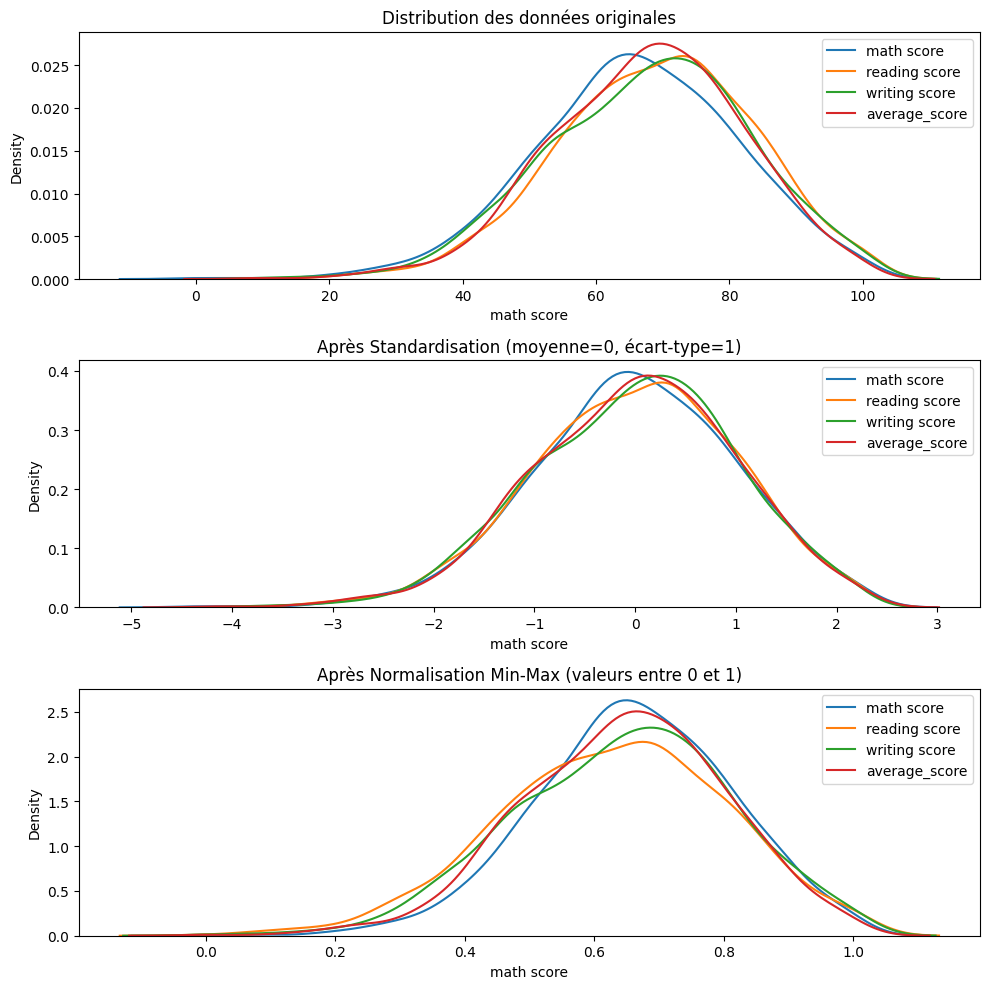

In [79]:

# Visualisation 
# Crée une figure verticale avec 3 graphiques empilés 
# Axes permet de créer différents graphes
fig, axes = plt.pyplot.subplots(3, 1, figsize=(10, 10))

# sns.kdeplot : 
# Fonction pour créer un graphique de densité (Kernel Density Estimation)
# Affiche la distribution des données sous forme de courbe de densité

# Données originales
for col in list_cols:
    sns.kdeplot(frame[col], ax=axes[0], label=col)
axes[0].set_title('Distribution des données originales')
axes[0].legend()

# Données standardisées
for col in list_cols:
    sns.kdeplot(standardized_df[col], ax=axes[1], label=col)
axes[1].set_title('Après Standardisation (moyenne=0, écart-type=1)')
axes[1].legend()

# Données normalisées
for col in list_cols:
    sns.kdeplot(normalized_df[col], ax=axes[2], label=col)
axes[2].set_title('Après Normalisation Min-Max (valeurs entre 0 et 1)')
axes[2].legend()

plt.pyplot.tight_layout()
plt.pyplot.show()

## 🔁 8. Suppression des variables trop corrélées

**0.** Comprendre la notion de corrélation linéaire. 

**23.** Calculez la **matrice de corrélation** entre les variables explicatives (`X`).

**24.** Supprimez les variables dont la corrélation dépasse un seuil (ex : > 0.9).

**25.** Réaffichez la heatmap pour valider.

          0        1         2   3
0       NaN  0.81758  0.802642 NaN
1  0.817580      NaN       NaN NaN
2  0.802642      NaN       NaN NaN
3       NaN      NaN       NaN NaN


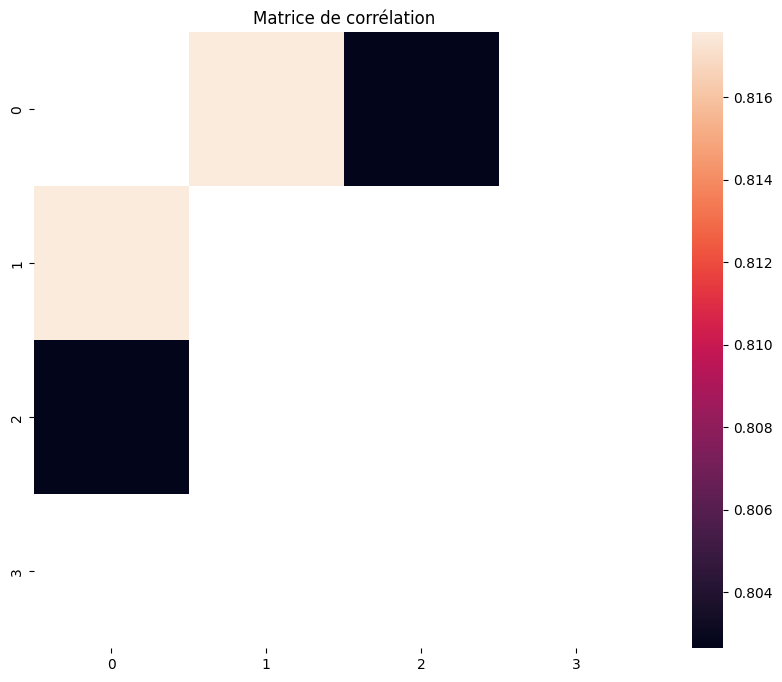

In [80]:
correlation = pd.DataFrame(standardized_data).corr()

correlation[correlation > 0.9] = np.nan

print(correlation)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation)
plt.title('Matrice de corrélation')
plt.show()

## 🧬 9. Réduction de dimension (PCA)

**0.** Comprendre la notion de réduction de dimension. Essayer de comprendre PCA globalement

**26.** Appliquez une **PCA** sur les données standardisées.

**27.** Affichez la variance expliquée par chaque composante.

**28.** Tracez un nuage de points 2D selon les 2 premières composantes.

In [ ]:
# Application de la PCA
pca = sk.decomposition.PCA()
pca.fit(standardized_data)
data_pca = pca.transform(standardized_data)
data_pca

array([[ 6.57503374e-01,  8.78420101e-02, -1.45037831e-01,
        -7.68715994e-16],
       [ 1.99922903e+00, -9.12414722e-01,  1.19053825e-01,
        -5.89556554e-16],
       [ 3.37113264e+00, -2.45386630e-02,  8.52948278e-02,
         6.06395728e-17],
       ...,
       [-3.60564566e-01, -3.48360623e-01,  2.47806825e-01,
         1.47197632e-15],
       [ 8.99098412e-01, -3.63408821e-01,  2.64566828e-02,
        -5.37555104e-16],
       [ 2.06999199e+00, -3.19232454e-01, -9.11790776e-03,
        -6.95133375e-16]], shape=(1000, 4))

Variance expliquée par chaque composante :
Composante 1: 92.96%
Composante 2: 5.92%
Composante 3: 1.12%
Composante 4: 0.00%


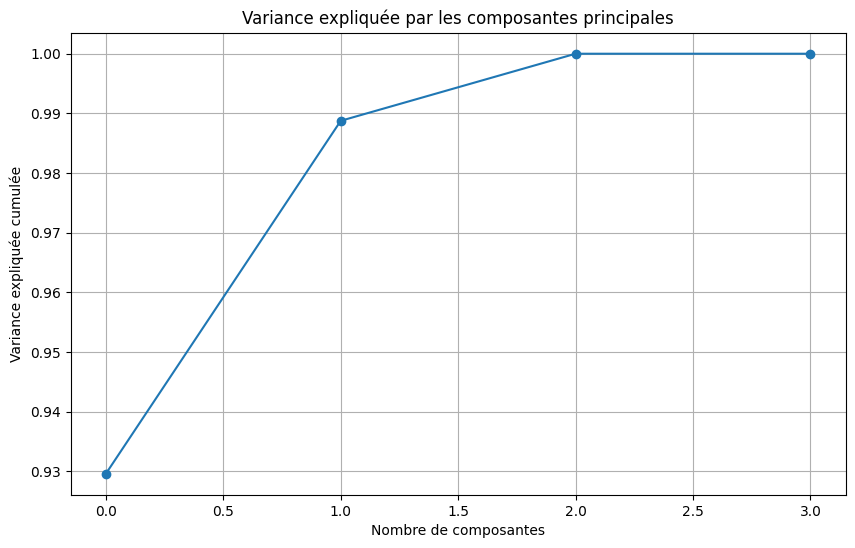

In [82]:
# Variance expliquée par chaque composante
variance_expliquee = pca.explained_variance_ratio_

# Affichage de la variance expliquée
print("Variance expliquée par chaque composante :")
for i, var in enumerate(variance_expliquee, 1):
    print(f"Composante {i}: {var*100:.2f}%")

# Courbe de la variance cumulée
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(variance_expliquee), 'o-')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée par les composantes principales')
plt.grid(True)
plt.show()

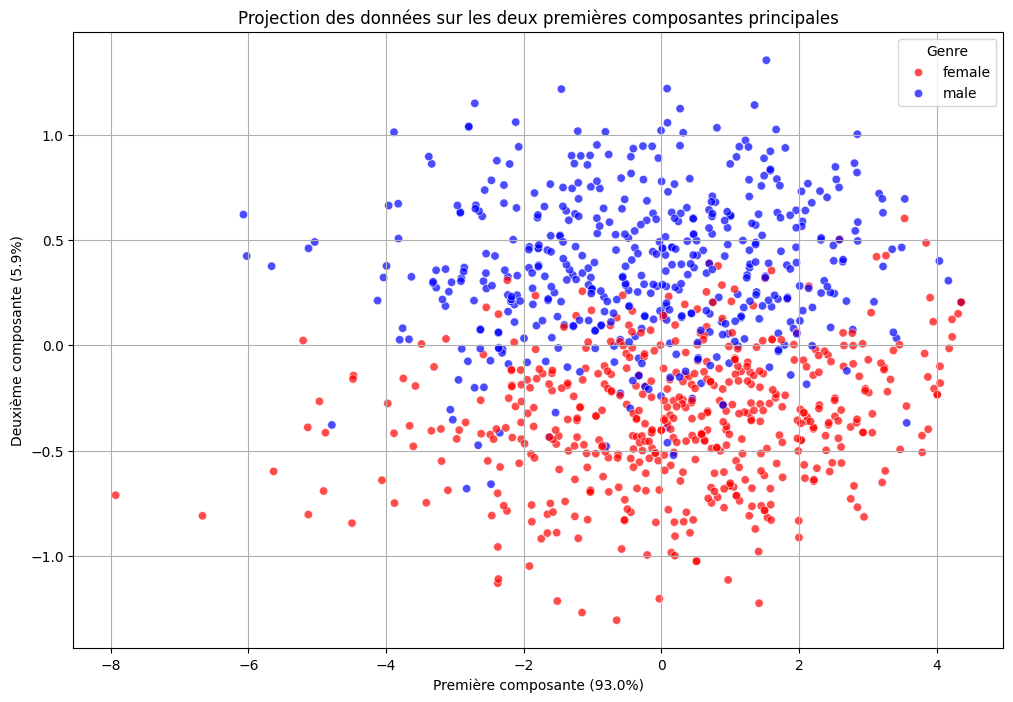

In [83]:
# Création d'un DataFrame pour les deux premières composantes
pca_df = pd.DataFrame(data=data_pca[:, 0:2], 
                     columns=['Première composante', 'Deuxième composante'])

# Ajout des étiquettes de genre pour la coloration
pca_df['Genre'] = frame['gender']

# Tracé du nuage de points
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, 
                x='Première composante', 
                y='Deuxième composante',
                hue='Genre',
                palette={'male': 'blue', 'female': 'red'},
                alpha=0.7)

# Ajout des pourcentages de variance expliquée
plt.xlabel(f'Première composante ({variance_expliquee[0]*100:.1f}%)')
plt.ylabel(f'Deuxième composante ({variance_expliquee[1]*100:.1f}%)')
plt.title('Projection des données sur les deux premières composantes principales')
plt.legend(title='Genre')
plt.grid(True)
plt.show()